**importing the libraries**

In [ ]:
import csv
import io
import os
import re
import string
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import LSTM, Embedding, Input, Dense, Bidirectional, BatchNormalization, Conv1D, Conv2D, MaxPool1D, MaxPooling1D, MaxPooling2D, Dropout, Flatten, TimeDistributed
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


**Reading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data** **Preprocessing**

In [ ]:
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))


def gpu():

  def preprocessing():

    data = []
    data_without_linespace = []
    data_without_space = []
    data_without_space2 = []
    data_without_xmin = []
    data_without_xmax = []
    data_without_text = []
    data_without_symbols = []
    new_data = []
      
    folder_path='/content/drive/MyDrive/FYP I/arabic-speech-corpus/textgrid/'
    folder = os.scandir('/content/drive/MyDrive/FYP I/arabic-speech-corpus/textgrid')

    for i in folder:
      '''reading the file from the above path'''
      print(i.name)

      file_path=folder_path+i.name
      f = open(file_path, 'r', encoding='utf-8')



      for i in range(10000):
        '''reading the data and storing it into the array'''
        x = f.readline()
        if x == '':
          continue
        data.append(x)



      for i in data:
        '''removing the linespace from the data'''
        k = i.replace('\n', '')
        data_without_linespace.append(k)



      for i in data_without_linespace:
        '''removing the space from the data'''
        z = re.sub(r'^\s+|\s+$', '', i)
        data_without_space.append(z)



        '''determining the item[2] and removing 
        all the elements of it into new array'''
      el = 'item [2]:'
      em = 'item [3]:'

      item2 = data_without_space.index(el)

      if em in data_without_space:
        item3 = data_without_space.index(em)
        new_list = np.array(data_without_space[item2+6:item3])

      else:
        new_list = np.array(data_without_space[item2+6:])






      for i in new_list:
        '''removing the "xmin =" word from the data'''
        _ = i.replace('xmin =', '')
        data_without_xmin.append(_)



      for i in data_without_xmin:
        '''removing the "xman =" word from the data'''
        a = i.replace('xmax =', '')
        data_without_xmax.append(a)



      for i in data_without_xmax:
        '''removing the "xman =" word from the data'''
        b = i.replace('text =', '')
        data_without_text.append(b)



      for i in data_without_text:
        '''removing the punctuation from the data'''
        punc=r'[!"#$%&\'-()*+,/:;<=>?@[\]^_`{|}~]'
        c = re.sub(punc, '', i)
        data_without_symbols.append(c)



      for i in data_without_symbols:
        '''removing the space from the data'''
        z = re.sub(r'^\s+|\s+$', '', i)
        data_without_space2.append(z)


      '''resahping the array'''
      reshaped = np.reshape(data_without_space2, (-1, 4))
      print(reshaped)

      for i in reshaped:
        '''appending each array after reshaping them 
          into new array to be ready for modelling'''
        new_data.append(i)


      '''making the arrays empty for the next file for preprocessing'''
      data = []
      data_without_linespace = []
      data_without_space = []
      data_without_space2 = []
      data_without_xmin = []
      data_without_xmax = []
      data_without_text = []
      data_without_symbols = []





    '''crating the head for the new data file'''
    fields = ['Interval', 'xmin', 'xmax', 'word']

    with open('data.csv', 'w') as f:
      '''using csv.writer method from CSV package'''
      write = csv.writer(f)
      
      write.writerow(fields)
      write.writerows(new_data)

  return preprocessing()

gpu()

**Spliting and Tokenizing the database**

In [ ]:
path = '/content/drive/MyDrive/FYP I/data.csv'

df = pd.read_csv(path)

x, y = df.iloc[:,1:3], df.iloc[:,-1]
x = np.array(x.astype(float))
y = np.array(y.astype(str))


print(x.dtype)
print(y.dtype)



vocab_size = 21425
embedding_dim = 16
max_length = 7606
pad_type='post'
trunc_type='post'


tokenizer = Tokenizer()
tokenizer.fit_on_texts(y)
word_index = tokenizer.word_index
total_words=len(word_index)
sequences = tokenizer.texts_to_sequences(y)
padded = pad_sequences(sequences, maxlen= max_length, padding= pad_type, truncating= trunc_type)


float64
object


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, padded, test_size=0.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(len(y_train))

(17140, 2)
(17140, 7606)
17140




---



# Modeling

**RNN Model**

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=total_words))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 7606, 100)         760600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 7606, 300)         301200    
_________________________________________________________________
dropout_8 (Dropout)          (None, 7606, 300)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_9 (Dense)              (None, 3803)              384103    
_________________________________________________________________
dropout_9 (Dropout)          (None, 3803)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 7606)             

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(
                                            # Stop training when `loss` is no longer improving
                                            monitor='loss',
                                            # "no longer improving" being further defined as "for at least 2 epochs"
                                            patience=2,
                                            restore_best_weights=True,
                                             verbose=1)

**Fiting the Model**

In [ ]:
# this is the best fitting into the model.
def gpu():
  history = model.fit(x_train, y_train,
                      batch_size=64,
                      steps_per_epoch=10,
                      epochs=10,
                      # validation_data=(x_test, y_test),
                      callbacks=callbacks,
                      validation_split=0.2,
                    )
  return history

In [ ]:
history=gpu()

Epoch 1/10
10/10 [==============================] - 5s 160ms/step - loss: 13353.1641 - accuracy: 0.9000 - val_loss: 11801.4971 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 1s 56ms/step - loss: 8042.9971 - accuracy: 1.0000 - val_loss: 184.7617 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 1s 54ms/step - loss: 24.5238 - accuracy: 1.0000 - val_loss: 2.9566 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 1s 54ms/step - loss: 3.6444 - accuracy: 1.0000 - val_loss: 4.6749 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 1s 55ms/step - loss: 5.8563 - accuracy: 1.0000 - val_loss: 7.5129 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 1s 54ms/step - loss: 9.2326 - accuracy: 1.0000 - val_loss: 11.5039 - val_accuracy: 1.0000
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


**Visulization**

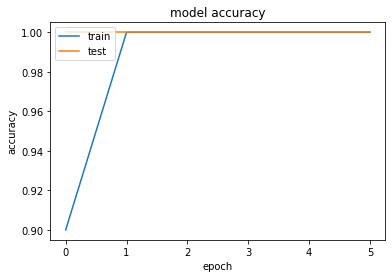

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

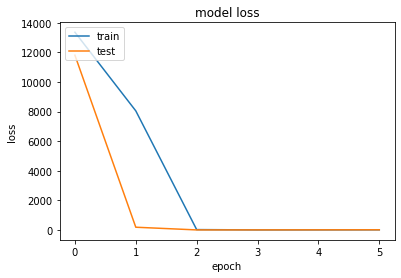

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**DNN Model**

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 17140, 32)         96        
_________________________________________________________________
dropout_10 (Dropout)         (None, 17140, 32)         0         
_________________________________________________________________
dense_12 (Dense)             (None, 17140, 64)         2112      
_________________________________________________________________
dropout_11 (Dropout)         (None, 17140, 64)         0         
_________________________________________________________________
dense_13 (Dense)             (None, 17140, 128)        8320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 17140, 128)        0         
_________________________________________________________________
dense_14 (Dense)             (None, 17140, 256)       

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(
                                            # Stop training when `loss` is no longer improving
                                            monitor='loss',
                                            # "no longer improving" being further defined as "for at least 2 epochs"
                                            patience=2,
                                            restore_best_weights=True,
                                             verbose=1)

**Fitting the Model**

In [ ]:
# this is the best fitting into the model.
def gpu():
  history = model.fit(x_train, y_train,
                      batch_size=64,
                      steps_per_epoch=10,
                      epochs=10,
                      # validation_data=(x_test, y_test),
                      callbacks=callbacks,
                      validation_split=0.2,
                    )
  return history

In [ ]:
history=gpu()

Epoch 1/10
10/10 [==============================] - 1s 69ms/step - loss: 4239.8447 - accuracy: 0.9000 - val_loss: 15.9281 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 48ms/step - loss: 16.8505 - accuracy: 1.0000 - val_loss: 18.4360 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 48ms/step - loss: 20.5899 - accuracy: 1.0000 - val_loss: 23.9470 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 39ms/step - loss: 27.8902 - accuracy: 1.0000 - val_loss: 33.6946 - val_accuracy: 1.0000
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


**visulization**

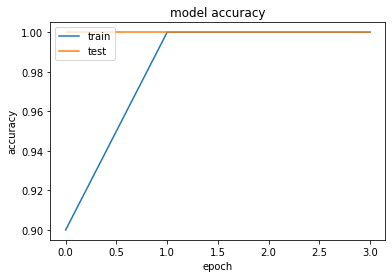

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

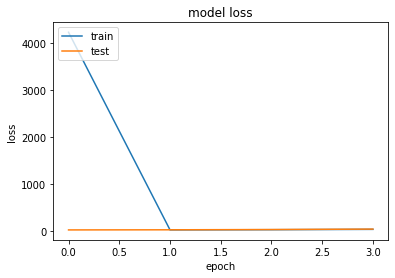

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()